# Optimización utilizando Descenso del Gradiente en una Variable

Para entender cómo optimizar funciones utilizando el descenso del gradiente, comienza con ejemplos simples: funciones de una variable. En este laboratorio, implementarás el método del descenso del gradiente para funciones con un solo mínimo y múltiples mínimos, experimentarás con los parámetros y visualizarás los resultados. Esto te permitirá comprender las ventajas y desventajas del método del descenso del gradiente.

# Tabla de Contenidos

- [ 1 - Función con un Mínimo Global](#1)
- [ 2 - Función con Múltiples Mínimos](#2)


## Paquetes

Ejecuta la siguiente celda para cargar los paquetes que necesitarás.


In [13]:
import numpy as np
import matplotlib.pyplot as plt


<a name='1'></a>
## 1 - Función con un Mínimo Global

La función $f\left(x\right)=e^x - \log(x)$ (definida para $x>0$) es una función de una variable que tiene solo un **punto mínimo** (llamado **mínimo global**). Sin embargo, a veces ese punto mínimo no se puede encontrar analíticamente, es decir, resolviendo la ecuación $\frac{df}{dx}=0$. Esto se puede hacer mediante un método de descenso del gradiente.

Para implementar el descenso del gradiente, necesitas comenzar desde algún punto inicial $x_0$. Con el objetivo de encontrar un punto donde la derivada sea igual a cero, quieres moverte "cuesta abajo". Calcula la derivada $\frac{df}{dx}(x_0)$ (llamada **gradiente**) y avanza al siguiente punto utilizando la expresión:

$$x_1 = x_0 - \alpha \frac{df}{dx}(x_0),\tag{1}$$

donde $\alpha>0$ es un parámetro llamado **tasa de aprendizaje**. Repite el proceso de manera iterativa. El número de iteraciones $n$ suele ser también un parámetro.

Restando $\frac{df}{dx}(x_0)$ te desplazas "cuesta abajo" en contra del aumento de la función, hacia el punto mínimo. Entonces, $\frac{df}{dx}(x_0)$ generalmente define la dirección del movimiento. El parámetro $\alpha$ sirve como un factor de escala.

¡Ahora es el momento de implementar el método de descenso del gradiente y experimentar con los parámetros!

Primero, define la función $f\left(x\right)=e^x - \log(x)$ y su derivada $\frac{df}{dx}\left(x\right)=e^x - \frac{1}{x}$:


In [14]:
def f_example_1(x):
    return np.exp(x) - np.log(x)

def dfdx_example_1(x):
    return np.exp(x) - 1/x

Function $f\left(x\right)$ has one global minimum. Let's plot the function:

In [15]:
def gen_x_values(low_limit, high_limit, num_samples):

    x_values = np.linspace(low_limit, high_limit, num=num_samples)

    return  x_values

def plot_f( x, function_Fx , points = None ):

    plot1 = plt.subplot2grid(shape=(1, 1), loc=(0, 0))

    if (points != None and function_Fx != None ):
        plot1.scatter(points,  function_Fx(points), color="red" )

    plot1.plot(x, function_Fx(x) )
    plot1.grid(visible=True,  axis='both')
    plt.show()

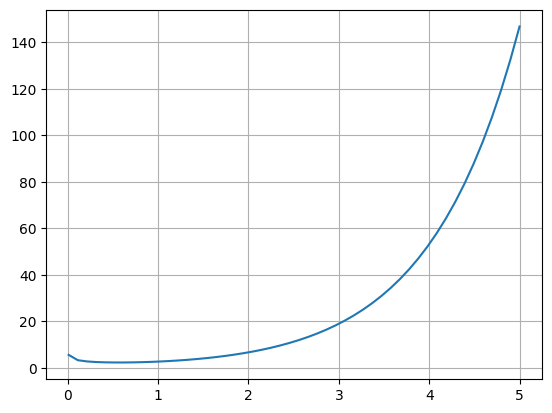

In [16]:
x_values = gen_x_values(low_limit=0.01, high_limit = 5, num_samples =50)

plot_f(x_values , f_example_1)

El descenso del gradiente se puede implementar en la siguiente función:


In [22]:
def gradient_descent(dfdx, x, learning_rate = 0.1, num_iterations = 100):
    for iteration in range(num_iterations):
        x = x - learning_rate * dfdx(x)
    return x

Ten en cuenta que hay tres parámetros en esta implementación: `num_iterations`, `learning_rate` y el punto inicial `x_initial`. Los parámetros del modelo para métodos como el descenso del gradiente generalmente se encuentran experimentalmente. Por ahora, asume que conoces los parámetros que funcionarán en este modelo; verás la discusión sobre eso más adelante. Para optimizar la función, configura los parámetros y llama a la función definida `gradient_descent`:


In [23]:
num_iterations = 25; learning_rate = 0.1; x_initial = 1.6

print("Gradient descent result: x_min =", gradient_descent(dfdx_example_1, x_initial, learning_rate, num_iterations))

Gradient descent result: x_min = 0.5671434156768685



¿Qué sucede si algunos de los parámetros se cambian? ¿El método siempre funcionará? Descomenta las líneas en la celda de abajo y vuelve a ejecutar el código para investigar qué sucede si se eligen otros valores de parámetros. Intenta investigar y analizar los resultados. Puedes leer algunos comentarios a continuación.


In [24]:
x_values = gen_x_values(low_limit=0.01, high_limit = 5, num_samples =50)

def gradient_descent(dfdx_example_1, x_initial, learning_rate, num_iterations):

    new_x  = x_initial

    x_array = []

    for idx in range(num_iterations):
        new_x = new_x - learning_rate*dfdx_example_1(new_x)
        x_array.append(new_x)

    print('x_values: {}', x_array)
    return x_array

In [25]:
#num_iterations = 25; learning_rate = 0.1; x_initial = 1.6
#num_iterations = 25; learning_rate = 0.3; x_initial = 1.6
#num_iterations = 25; learning_rate = 0.5; x_initial = 1.6
#num_iterations = 50; learning_rate = 0.04; x_initial = 1.6
num_iterations = 75; learning_rate = 0.04; x_initial = 1.6
# num_iterations = 25; learning_rate = 0.1; x_initial = 0.05
# num_iterations = 25; learning_rate = 0.1; x_initial = 0.03
# num_iterations = 25; learning_rate = 0.1; x_initial = 0.02

x_grad = gradient_descent(dfdx_example_1, x_initial, learning_rate, num_iterations)

print("Minimim value of cost function: " + str( np.min(x_grad)) )


x_values: {} [1.4268787030241954, 1.2882848572002126, 1.1742714450095697, 1.07890373376055, 0.9983202771776849, 0.9298387910967498, 0.8714929756822105, 0.821772138251024, 0.7794663499483764, 0.7435711733935237, 0.7132282665053238, 0.6876885679367768, 0.6662899316658077, 0.6484438410002923, 0.6336274943230152, 0.6213787092883477, 0.6112919813037396, 0.6030147304097272, 0.5962432902532547, 0.5907185402544143, 0.5862212789693455, 0.5825675186123283, 0.5796038874396385, 0.5772032931119289, 0.5752609517121043, 0.5736908393998663, 0.5724225843915914, 0.5713987884239428, 0.570572748487126, 0.5699065394962884, 0.5693694145103102, 0.5689364791222185, 0.5685875991556276, 0.5683065046528469, 0.5680800575455327, 0.5678976548563679, 0.5677507434952075, 0.5676324265317704, 0.567537144187329, 0.5674604156842068, 0.5673986305504681, 0.5673488800402869, 0.567308821046573, 0.5672765663002101, 0.5672505958153731, 0.5672296854938874, 0.5672128495793436, 0.5671992942844157, 0.5671883804285356, 0.5671795933

x_values: {} [1.4268787030241954, 1.2882848572002126, 1.1742714450095697, 1.07890373376055, 0.9983202771776849, 0.9298387910967498, 0.8714929756822105, 0.821772138251024, 0.7794663499483764, 0.7435711733935237, 0.7132282665053238, 0.6876885679367768, 0.6662899316658077, 0.6484438410002923, 0.6336274943230152, 0.6213787092883477, 0.6112919813037396, 0.6030147304097272, 0.5962432902532547, 0.5907185402544143, 0.5862212789693455, 0.5825675186123283, 0.5796038874396385, 0.5772032931119289, 0.5752609517121043, 0.5736908393998663, 0.5724225843915914, 0.5713987884239428, 0.570572748487126, 0.5699065394962884, 0.5693694145103102, 0.5689364791222185, 0.5685875991556276, 0.5683065046528469, 0.5680800575455327, 0.5678976548563679, 0.5677507434952075, 0.5676324265317704, 0.567537144187329, 0.5674604156842068, 0.5673986305504681, 0.5673488800402869, 0.567308821046573, 0.5672765663002101, 0.5672505958153731, 0.5672296854938874, 0.5672128495793436, 0.5671992942844157, 0.5671883804285356, 0.5671795933

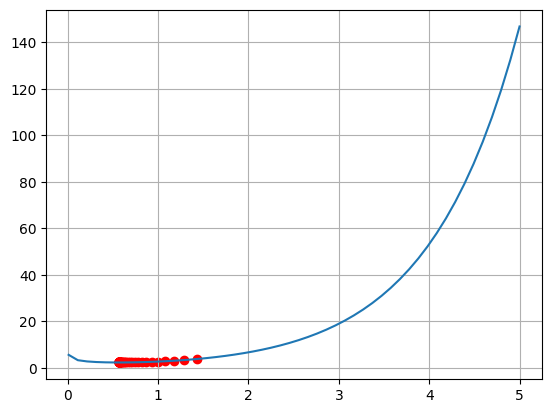

In [26]:
x_grad = gradient_descent(dfdx_example_1, x_initial, learning_rate, num_iterations)

plot_f( x_values, f_example_1 , points = x_grad)